In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [18,12]
plt.rcParams.update({'font.size' : 20})

In [3]:
#  Creat a simple signal with three freq
dt = 1e-3
t = np.arange(0,1,dt)
f = np.sin(2*np.pi*30*t) + np.sin(2*np.pi*70*t)+ np.sin(2*np.pi*100*t)
f_noise = f + 2*np.random.randn(len(t))

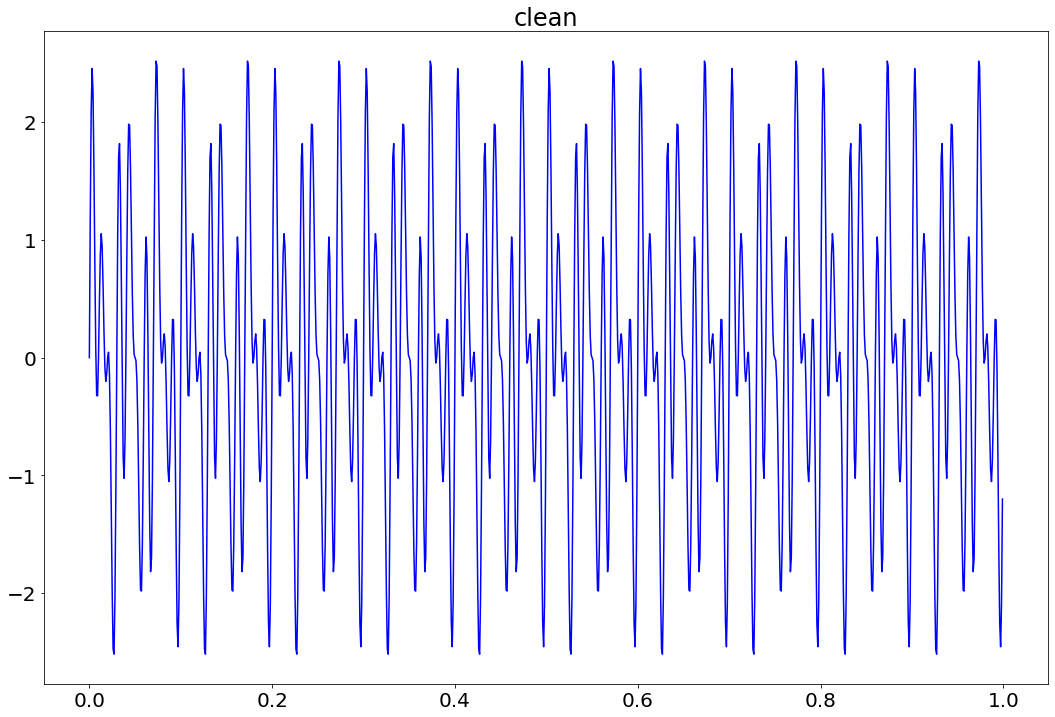

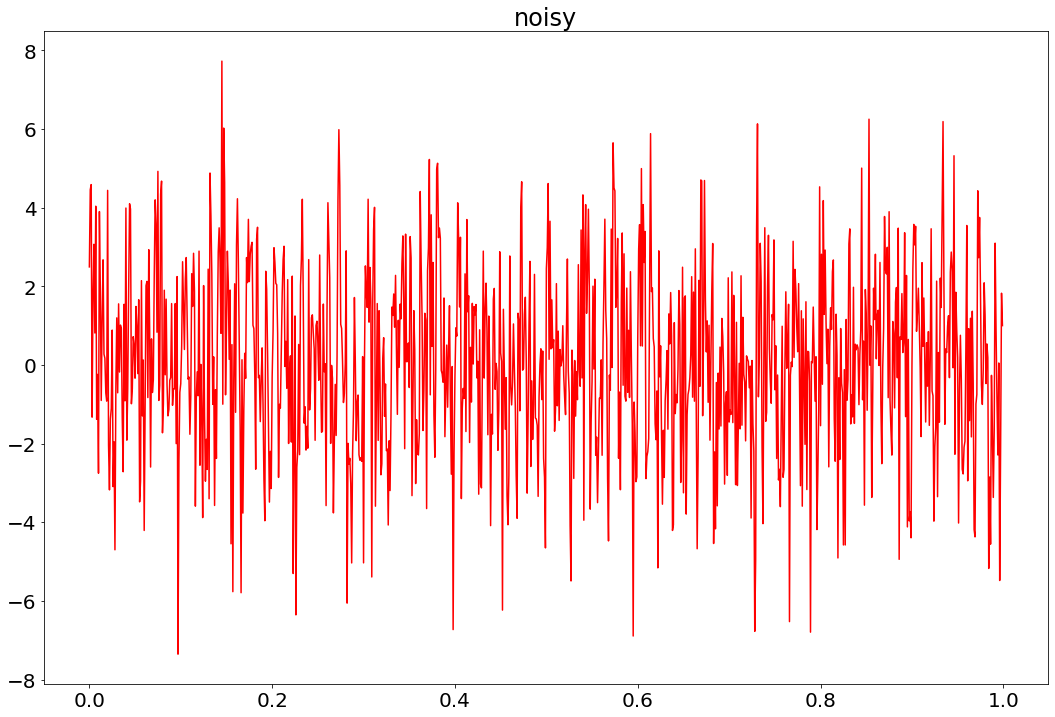

In [4]:
plt.plot(t,f , color = "blue")
plt.title('clean')
plt.show()
x = plt.show()
plt.plot(t,f_noise, color = "red")
plt.title('noisy')
plt.show()

In [5]:
# use fft to denoise the signal 
n = len(t)
f_hat = np.fft.fft(f_noise,n)
PSD = f_hat*np.conj(f_hat)/n
freq = (1/(dt*n))*np.arange(n)
L = np.arange(1,np.floor(n/2),dtype='int')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


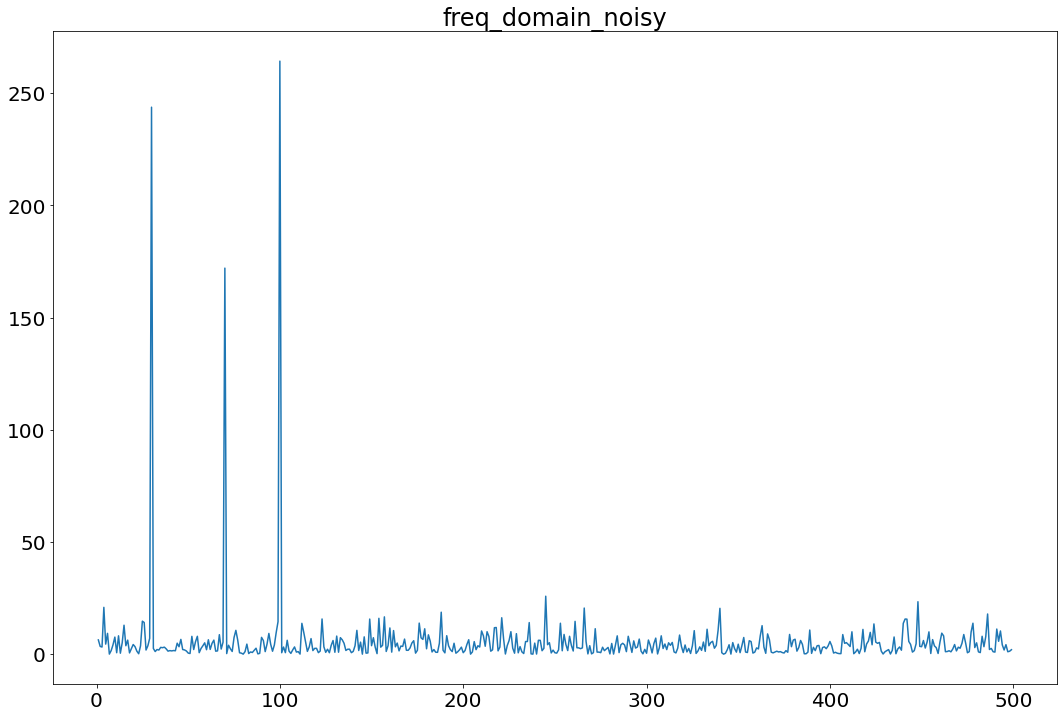

In [9]:
plt.plot(freq[L],PSD[L])
plt.title('freq_domain_noisy')
plt.show()

In [12]:
# zero out all freq under 100 amp 
ind = PSD > 100 
PSD_clean = PSD * ind
f_hat *= ind
# inverse fft 
i_fft = np.fft.ifft(f_hat)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


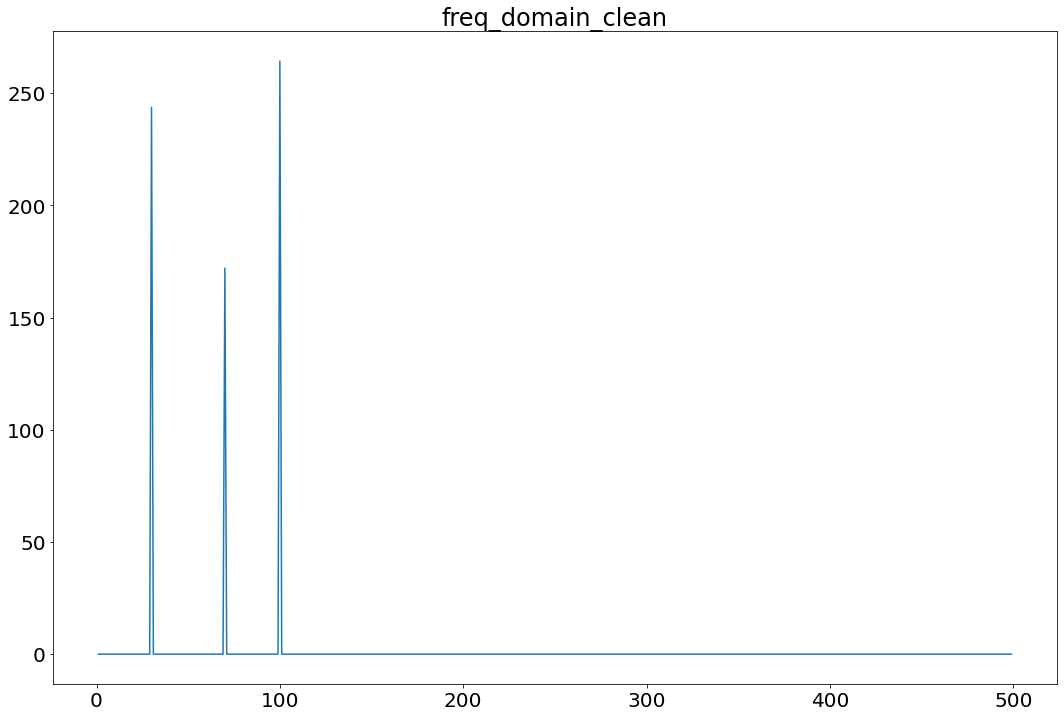

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


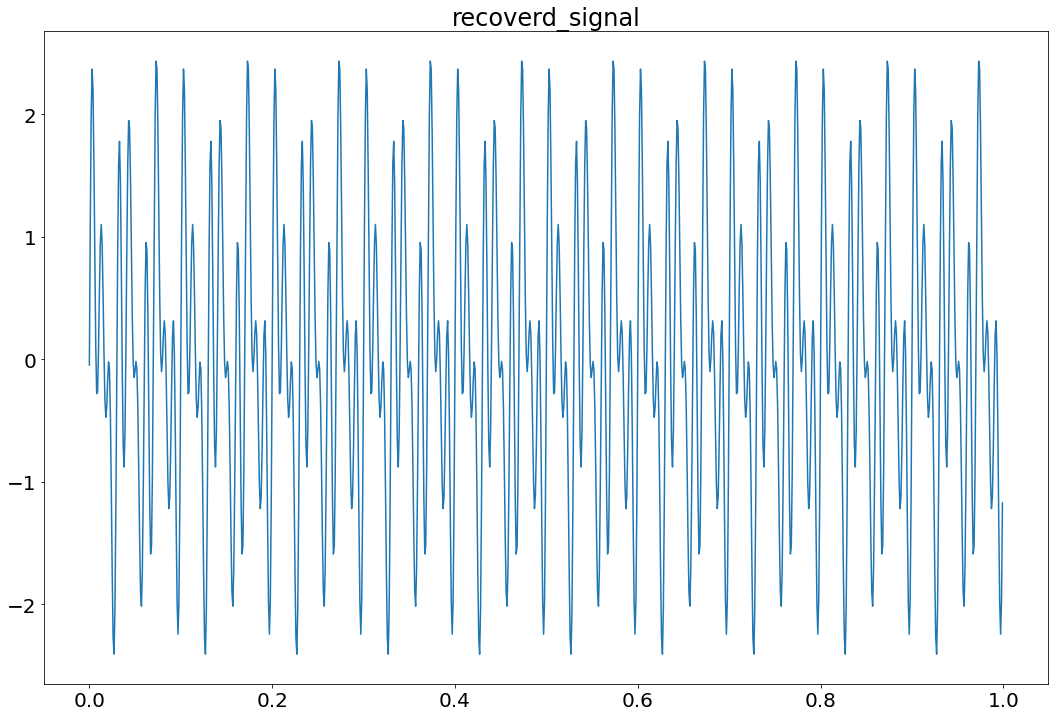

In [13]:
plt.plot(freq[L],PSD_clean[L])
plt.title('freq_domain_clean')
plt.show()

plt.plot(t,i_fft)
plt.title('recoverd_signal')
plt.show()